##Open Source Approach: Python

###Chieko Maene (cmaene@uchicago.edu)
Last modified on 8-20-2015.

Related to: https://gis.uchicago.edu/blog/open-source-approach-python

Here are important notes and the tutorial work flow..
(1) Make sure you installed GDAL with python- & GEOS-bindings (some Python OGR functions are built on GEOS library)
(2) Also make sure that you have the following extra packages - numpy, geopy, pyshp
(3) Please download the tutorial data files, set your working directory, and try the scripts!
(4) R users - similar analysis examples using the same data are posted here -> http://rpubs.com/cmaene/opensourceapproach_r

In [1]:
#!/user/bin/python
# -*- coding: utf-8 -*- python version 2.7.6

# load the libraries we will use in this tutorial..
import os, sys, ogr, osr, gdal
import matplotlib.pyplot as plt
# to make iPython notebook to produce plots inline
%matplotlib inline

### 1. Preparation
Download and unzip data, set your working directory

In [2]:
# set the working directory
os.chdir('/home/chieko/Documents/Python')

## download the tutorial data - skip this part if you've done this already
## need urllib if you download a data file (see the next block) in Python
#import urllib
#urllib.urlretrieve("http://home.uchicago.edu/~cmaene/data.zip", filename="data.zip")
## unzip the file - may not work with all OS - skip this part if you've done this already
#os.system('unzip data.zip')

os.chdir('data')
# os.listdir('.') # see what are in there
print "current working directory is:", os.getcwd()

current working directory is: /home/chieko/Documents/Python/data


### 2. GDAL's ogr - Read Data 

References:
http://gdal.org/python/ , 
http://pcjericks.github.io/py-gdalogr-cookbook

In [3]:
# read spatial objects in CSV - require supplemental/descriptive meta file, VRT
# VRT acts like a supplemental metadata, describes another CSV properties
with open('GPS.vrt', 'r') as vrt:
    print "This is what GPS.vrt looks like:"
    print vrt.read()

datasource=ogr.GetDriverByName('VRT').Open('GPS.vrt')
# because of VRT description, our CSV points know their SRS!
print "Spatial Reference System (SRS) of the data source is\n", datasource.GetLayer().GetSpatialRef()
print "\nTranslate the Well-Known-Text SRS to Proj4! \n", datasource.GetLayer().GetSpatialRef().ExportToProj4()

# optional: conversion from VRT to shapefile - I think GDAL utility, ogr2ogr, is the best/easiest
# os.system('ogr2ogr -skipfailures -overwrite -f "ESRI Shapefile" GPS.shp GPS.vrt')

This is what GPS.vrt looks like:
<OGRVRTDataSource>
    <OGRVRTLayer name="GPS">
        <SrcDataSource>./GPS.csv</SrcDataSource>
        <GeometryType>wkbPoint</GeometryType>
        <LayerSRS>WGS84</LayerSRS>
        <GeometryField encoding="PointFromColumns" x="x" y="y"/>
    </OGRVRTLayer>
</OGRVRTDataSource>

Spatial Reference System (SRS) of the data source is
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        TOWGS84[0,0,0,0,0,0,0],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9108"]],
    AUTHORITY["EPSG","4326"]]

Translate the Well-Known-Text SRS to Proj4! 
+proj=longlat +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +no_defs 


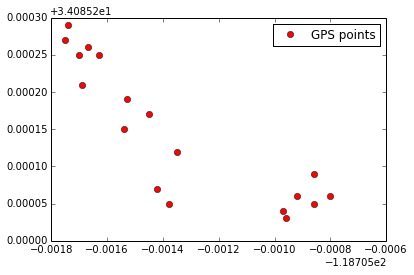

In [4]:
# plot the GPS points
plt.figure()
# loop thru shaperecords to get x/y from each feature (point/line/polygon)
x,y=[],[]
for feature in datasource.GetLayer():
    geomRef=feature.GetGeometryRef()
    x.append(geomRef.GetX()) # get X from each point and add to the list
    y.append(geomRef.GetY()) # get y from each point and add to the list
plt.plot(x,y, 'ro', label='GPS points') # 'ro' means red o-marker
plt.legend(numpoints=1)
plt.show()

Line : roads
- Geometry type is 2
- The feature's geometry name is LINESTRING
- Structure of the 1st feature is LINESTRING (-118.697037036553141 34.0786842643966,-118.69745 34.07869,-118.69807 34.07868,-118.69847 34.07874)
- Number of points in the 1st feature is 4

Polygon : study area. Feature geometry is complex - compare to the line above
- Geometry type is 3
- The feature's geometry name is LINEARRING
- Structure of the 1st feature is POLYGON ((-118.71101851803607 34.076111110005783,-118.71101851803607 34.089537035932771,-118.69703703655351 34.089537035932771,-118.69703703655351 34.076111110005783,-118.71101851803607 34.076111110005783))
- Number of points in the 1st feature are 5 (the first and the last points are identical!)


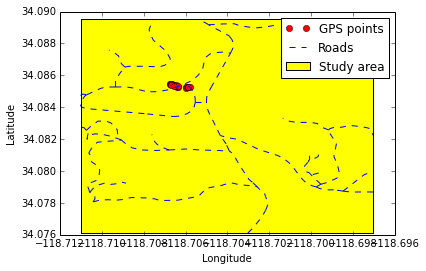

In [5]:
# plot the GPS points with lines and a polygon 
plt.figure()

# add the GPS points
gps=ogr.GetDriverByName('ESRI Shapefile').Open('GPS.shp')
for feature in gps.GetLayer():
    geomRef=feature.GetGeometryRef()
    x=[geomRef.GetX(i) for i in range(geomRef.GetPointCount())] #although points has only one object..
    y=[geomRef.GetY(i) for i in range(geomRef.GetPointCount())] #although points has only one object..
    i1,=plt.plot(x,y, 'ro')
    
# read road lines and add the lines - learn the object
roads=ogr.GetDriverByName('ESRI Shapefile').Open('roads.shp')
print "Line : roads"
print "- Geometry type is", roads.GetLayer().GetGeomType()
# OGRwkbGeometryType {
# wkbUnknown = 0, wkbPoint = 1, wkbLineString = 2, wkbPolygon = 3,
# wkbMultiPoint = 4, wkbMultiLineString = 5, wkbMultiPolygon = 6, wkbGeometryCollection = 7,
# wkbCircularString = 8, wkbCompoundCurve = 9, wkbCurvePolygon = 10, wkbMultiCurve = 11,
# wkbMultiSurface = 12, wkbNone = 100, wkbLinearRing = 101, wkbCircularStringZ = 1008, ...
feature0=roads.GetLayer().GetFeature(0)
print "- The feature's geometry name is", feature0.GetGeometryRef().GetGeometryName()
print "- Structure of the 1st feature is", feature0.GetGeometryRef().ExportToWkt() 
print "- Number of points in the 1st feature is", feature0.GetGeometryRef().GetPointCount()
for feature in roads.GetLayer():
    geomRef=feature.GetGeometryRef()
    x=[geomRef.GetX(i) for i in range(geomRef.GetPointCount())]
    y=[geomRef.GetY(i) for i in range(geomRef.GetPointCount())]
    i2,=plt.plot(x,y, 'r--', color='blue')
    
# read studyarea polygon and add the polygon
area=ogr.GetDriverByName('ESRI Shapefile').Open('studyarea.shp')
print "\nPolygon : study area. Feature geometry is complex - compare to the line above"
print "- Geometry type is", area.GetLayer().GetGeomType()
feature0=area.GetLayer().GetFeature(0)
print "- The feature's geometry name is", feature0.GetGeometryRef().GetGeometryRef(0).GetGeometryName()
print "- Structure of the 1st feature is", feature0.GetGeometryRef().ExportToWkt() # notice that polygon points are within extra ()
print "- Number of points in the 1st feature are", feature0.GetGeometryRef().GetGeometryRef(0).GetPointCount(), "(the first and the last points are identical!)"
for feature in area.GetLayer(): 
    geomRef=feature.GetGeometryRef()
    x=[geomRef.GetGeometryRef(0).GetX(i) for i in range(geomRef.GetGeometryRef(0).GetPointCount())]
    y=[geomRef.GetGeometryRef(0).GetY(i) for i in range(geomRef.GetGeometryRef(0).GetPointCount())]
    plt.plot(x,y, '-', color='black')
    i3,=plt.fill(x, y, 'yellow')

# draw the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# take the scientific notation from xy axis tick labels
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
# add legend items
legend=plt.legend([i1,i2,i3],['GPS points','Roads','Study area'])
legend.get_frame().set_facecolor('white')
plt.show()

### 3. GDAL's ogr - Select By Attributes

Despite having somehow complex data models, ogr has many advantages. Select by attribute is one..

Reference:
(1) by attribute filter: https://pcjericks.github.io/py-gdalogr-cookbook/vector_layers.html#filter-by-attribute , (2) by SQL: http://www.gdal.org/ogr_sql.html, http://gdal.org/python/osgeo.ogr.DataSource-class.html#ExecuteSQL


Spatial Reference System (SRS) of the data source is:
PROJCS["NAD_1983_StatePlane_Illinois_East_FIPS_1201_Feet",
    GEOGCS["GCS_North_American_1983",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS_1980",6378137.0,298.257222101]],
        PRIMEM["Greenwich",0.0],
        UNIT["Degree",0.0174532925199433]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["False_Easting",984250.0],
    PARAMETER["False_Northing",0.0],
    PARAMETER["Central_Meridian",-88.33333333333333],
    PARAMETER["Scale_Factor",0.999975],
    PARAMETER["Latitude_Of_Origin",36.66666666666666],
    UNIT["Foot_US",0.3048006096012192]]

Number of census tracts are 866
Number of Census tracts with BLK>1000 are 292
The SQL result is a new OGR layer: <class 'osgeo.ogr.Layer'>


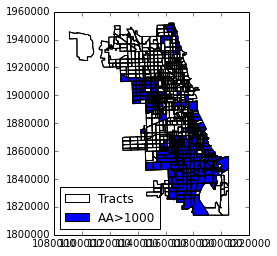

In [6]:
# census tract mapping -
datasource=ogr.GetDriverByName('ESRI Shapefile').Open('tracts.shp')
# read SRS info
print "Spatial Reference System (SRS) of the data source is:\n", datasource.GetLayer().GetSpatialRef()
print "\nNumber of census tracts are", datasource.GetLayer().GetFeatureCount()

# start a new plot
plt.figure()

# read and plot the census tract shapefile
for feature in datasource.GetLayer():
    geomRef=feature.GetGeometryRef()
    x = [geomRef.GetGeometryRef(0).GetX(i) for i in range(geomRef.GetGeometryRef(0).GetPointCount())]
    y = [geomRef.GetGeometryRef(0).GetY(i) for i in range(geomRef.GetGeometryRef(0).GetPointCount())]
    plt.plot(x,y, '-', color='black')
    i1,=plt.fill(x,y,'white')

# one way to make a selection is to set an attribute filter
datasource.GetLayer().SetAttributeFilter("BLK>1000")
print "Number of Census tracts with BLK>1000 are", datasource.GetLayer().GetFeatureCount()
# clear previous attribute selection filter by passing None
datasource.GetLayer().SetAttributeFilter(None) 
    
# another way is to use SQL
selection=datasource.ExecuteSQL("select * from tracts where BLK>1000")
print "The SQL result is a new OGR layer:", type(selection)

# plot the selected census tracts
for feature in selection:
    geomRef=feature.GetGeometryRef()
    x = [geomRef.GetGeometryRef(0).GetX(i) for i in range(geomRef.GetGeometryRef(0).GetPointCount())]
    y = [geomRef.GetGeometryRef(0).GetY(i) for i in range(geomRef.GetGeometryRef(0).GetPointCount())]
    plt.plot(x,y, '-', color='black')
    i2,=plt.fill(x, y, 'blue')
plt.gca().set_aspect('equal', adjustable='box') # make axes intervals the same
plt.legend([i1,i2],['Tracts','AA>1000'], loc='lower left')
plt.show()

### 4. GDAL's ogr - Buffer

Here we try buffer operation - an OGR function built on GEOS library

Number of features in the CTAbrown.shp is 27
Number of geometries in the buffer is 1
Total area of the buffer is 275055462 square feet.


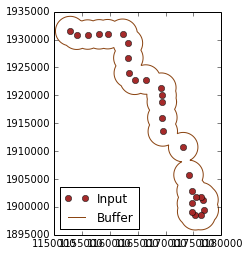

In [7]:
# inputs are Chicago Train stations
sts=ogr.GetDriverByName('ESRI Shapefile').Open('CTAbrown.shp')
print "Number of features in the CTAbrown.shp is", sts.GetLayer().GetFeatureCount()

# Let's create a buffer around the stations, will also merge overlapping buffers
stsBufferMerge = ogr.Geometry(ogr.wkbPolygon)  # create an empty polygon
# for each feature/point create a buffer
for feature in sts.GetLayer():
    geomRef=feature.GetGeometryRef()
    stsBuffer=geomRef.Buffer(2640)
    # then merge the new buffer with the merge-buffer-polygon
    stsBufferMerge=stsBufferMerge.Union(stsBuffer)
print "Number of geometries in the buffer is", stsBufferMerge.GetGeometryCount()
print "Total area of the buffer is", format(stsBufferMerge.GetArea(),'.0f'), "square feet."

# plot
plt.figure()
x,y=[],[]
# correct XY of all station points
sts=ogr.GetDriverByName('ESRI Shapefile').Open('CTAbrown.shp')
for feature in sts.GetLayer():
    geomRef=feature.GetGeometryRef()
    x.append(geomRef.GetX()) # get X from each point and add to the list
    y.append(geomRef.GetY()) # get y from each point and add to the list
i1,=plt.plot(x,y, 'ro', color='brown')
# add the merged buffer - no loop, only one geometry
x = [stsBufferMerge.GetGeometryRef(0).GetX(i) for i in range(stsBufferMerge.GetGeometryRef(0).GetPointCount())]
y = [stsBufferMerge.GetGeometryRef(0).GetY(i) for i in range(stsBufferMerge.GetGeometryRef(0).GetPointCount())]
i2,=plt.plot(x,y, '-', color='saddlebrown')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend([i1,i2],['Input','Buffer'], loc='lower left')
plt.show()

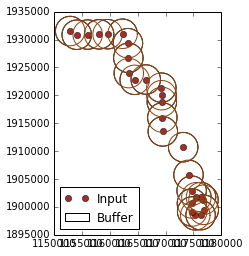

In [8]:
# OR, use a reusable function - the following is written by the 3rd party
# ref: http://pcjericks.github.io/py-gdalogr-cookbook/vector_layers.html#create-buffer
def createBuffer(inputfn, outputBufferfn, bufferDist):
    inputds = ogr.Open(inputfn)
    inputlyr = inputds.GetLayer()
    shpdriver = ogr.GetDriverByName('ESRI Shapefile')
    if os.path.exists(outputBufferfn):
        shpdriver.DeleteDataSource(outputBufferfn)
    outputBufferds = shpdriver.CreateDataSource(outputBufferfn)
    bufferlyr = outputBufferds.CreateLayer(outputBufferfn, geom_type=ogr.wkbPolygon)
    featureDefn = bufferlyr.GetLayerDefn()
    for feature in inputlyr:
        ingeom = feature.GetGeometryRef()
        geomBuffer = ingeom.Buffer(bufferDist)
        outFeature = ogr.Feature(featureDefn)
        outFeature.SetGeometry(geomBuffer)
        bufferlyr.CreateFeature(outFeature)

# read input, add to a plot
plt.figure()
sts=ogr.GetDriverByName('ESRI Shapefile').Open('CTAbrown.shp')
x,y=[],[]
for feature in sts.GetLayer():
    geomRef=feature.GetGeometryRef()
    x.append(geomRef.GetX()) # get X from each point and add to the list
    y.append(geomRef.GetY()) # get y from each point and add to the list
i1,=plt.plot(x,y, 'ro', color='brown')

# create buffers by half-mile (2640 ft) the input CSR unit is USfeet
createBuffer('CTAbrown.shp', 'CTAbrownBuffer.shp', 2640)

# read the output buffers and add to the plot 
datasource=ogr.GetDriverByName('ESRI Shapefile').Open('CTAbrownBuffer.shp')
for feature in datasource.GetLayer():
    geomRef=feature.GetGeometryRef()
    x = [geomRef.GetGeometryRef(0).GetX(i) for i in range(geomRef.GetGeometryRef(0).GetPointCount())]
    y = [geomRef.GetGeometryRef(0).GetY(i) for i in range(geomRef.GetGeometryRef(0).GetPointCount())]
    plt.plot(x,y, '-', color='saddlebrown')
    i2,=plt.fill(x,y,'white')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend([i1,i2],['Input','Buffer'], loc='lower left')
plt.show()

### 5. GDAL's ogr2ogr - Reprojection

Reprojection - changing spatial reference system (SRS). Here, we reproject apartments to save in the same SRS as the buffer. I am using GDAL system utility, ogr2ogr - much easier to achieve than using OGR/OSR python package

In [9]:
# compare SRS of the two shapefiles
sts=ogr.GetDriverByName('ESRI Shapefile').Open('CTAbrown.shp')
print "SRS of CTA stations is:\n", sts.GetLayer().GetSpatialRef().ExportToProj4()
apt=ogr.GetDriverByName('ESRI Shapefile').Open('apartments.shp')
print "\nSRS of the original apartments is:\n", apt.GetLayer().GetSpatialRef().ExportToProj4()

# copy SRS from "CTA stations" in proj4, then apply it to reproject "apartments" which was originally in WGS84
# if we knew EPSG code, we could also use the code: ex. tosrs='EPSG:102671'
tosrs=sts.GetLayer().GetSpatialRef().ExportToProj4()
fmsrs=apt.GetLayer().GetSpatialRef().ExportToProj4()
args='ogr2ogr -overwrite -f "ESRI Shapefile" -t_srs "'+tosrs+'" -s_srs "'+fmsrs+'" apartmentsNEW.shp apartments.shp'
os.system(args)

# use the reproject apartments
apt=ogr.GetDriverByName('ESRI Shapefile').Open('apartmentsNEW.shp')
print "\nSRS of the reprojected apartments is:\n", apt.GetLayer().GetSpatialRef().ExportToProj4()

SRS of CTA stations is:
+proj=tmerc +lat_0=36.66666666666666 +lon_0=-88.33333333333333 +k=0.9999749999999999 +x_0=300000 +y_0=0 +datum=NAD83 +units=us-ft +no_defs 

SRS of the original apartments is:
+proj=longlat +datum=WGS84 +no_defs 

SRS of the reprojected apartments is:
+proj=tmerc +lat_0=36.66666666666666 +lon_0=-88.33333333333333 +k=0.9999749999999999 +x_0=300000.0000000001 +y_0=0 +datum=NAD83 +units=us-ft +no_defs 


### 6. GDAL's ogr - Select By Location (Overlay)

Another OGR advantage is the ability to select objects by location. We will use the previously merged buffer to select apartments

Note: if saving/writing results is important, consider ogr2ogr - much faster/easier. Writing features, i.e. geometry+attributes, is a bit tedious in OGR python package (my opinion only!)

>args='ogr2ogr -sql "SELECT ST_Intersection(A.geometry, B.geometry) AS geometry, A.*, B.*FROM CTAbrownBufferDissolve A, apartments B WHERE ST_Intersects(A.geometry, B.geometry)" -dialect SQLITE . . -nln apartmentsSelected'

>os.system(args)

Total number of selected apartments is: 10


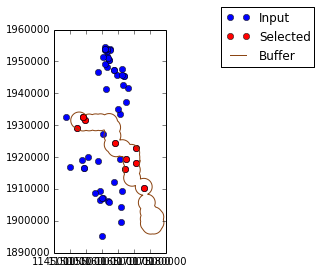

In [10]:
# plot all apartments
plt.figure()
x,y=[],[]
# correct XY of all station points
apt=ogr.GetDriverByName('ESRI Shapefile').Open('apartmentsNEW.shp')
for feature in apt.GetLayer():
    geomRef=feature.GetGeometryRef()
    x.append(geomRef.GetX()) # get X from each point and add to the list
    y.append(geomRef.GetY()) # get y from each point and add to the list
i1,=plt.plot(x,y, 'bo')

# make a selection by location/buffer zone using a spatial filter
apt.GetLayer().SetSpatialFilter(stsBufferMerge)
print "Total number of selected apartments is:", apt.GetLayer().GetFeatureCount()

# plot selected apartments
x,y=[],[]
# correct XY of all station points
for feature in apt.GetLayer():
    geomRef=feature.GetGeometryRef()
    x.append(geomRef.GetX()) # get X from each point and add to the list
    y.append(geomRef.GetY()) # get y from each point and add to the list
i2,=plt.plot(x,y, 'ro')

# add the merged buffer - no loop, only one geometry
x = [stsBufferMerge.GetGeometryRef(0).GetX(i) for i in range(stsBufferMerge.GetGeometryRef(0).GetPointCount())]
y = [stsBufferMerge.GetGeometryRef(0).GetY(i) for i in range(stsBufferMerge.GetGeometryRef(0).GetPointCount())]
i3,=plt.plot(x,y, '-', color='saddlebrown')

# put all together
plt.gca().set_aspect('equal', adjustable='box')
plt.legend([i1,i2,i3],['Input','Selected','Buffer'], bbox_to_anchor=(1,1), bbox_transform=plt.gcf().transFigure)
plt.show()

### 7. Geopy's vicenty - Distance Calculation

Let's calculate the distance to the nearest CTA stations from each apartment using Geopy's vincenty function!

In [11]:
# import geodesic distance calculation function
from geopy.distance import vincenty

# vincenty takes long/lat geographic coordinates only - reproject CTA brown stations
args='ogr2ogr -overwrite -f "ESRI Shapefile" -t_srs EPSG:4326 CTAbrownWGS84.shp CTAbrown.shp'
os.system(args)
sts=ogr.GetDriverByName('ESRI Shapefile').Open('CTAbrownWGS84.shp')
# collect all station IDs & xy coordinates in the two lists
stsId,xy=[],[]
for feature in sts.GetLayer():
    #print feature2.GetField("STATION_ID")
    stsId.append(feature.GetField("STATION_ID"))
    geomSts=feature.GetGeometryRef()
    x=geomSts.GetX()
    y=geomSts.GetY()
    xy.append((y,x))

# print the calculation result
print "\nAPTID PRICE NEAR_STATIONID DISTANCE_MILE"
# for each apartment, calculate distance and identify the nearest station
apt=ogr.GetDriverByName('ESRI Shapefile').Open('apartments.shp')
for feature1 in apt.GetLayer():
    geomApt=feature1.GetGeometryRef()
    x1=geomApt.GetX()
    y1=geomApt.GetY()
    # lambda function lets us iterate vincenty over xy list
    # map() collects and saves the result in the dist list
    dist=map(lambda i:vincenty((y1,x1),i).miles, xy) 
    print feature1.GetField("APTID"),feature1.GetField("PRICE"),stsId[dist.index(min(dist))], format(min(dist),'5.3f')


APTID PRICE NEAR_STATIONID DISTANCE_MILE
1 1150 90 2.850
2 1100 90 0.788
3 1050 90 2.824
7 1150 1480 2.991
8 1080 530 0.312
9 900 1310 1.303
11 925 1290 0.467
13 1000 1180 0.202
14 1100 1290 0.790
16 1100 90 2.307
19 1150 90 3.244
20 900 90 3.252
21 900 660 2.309
32 965 90 3.702
33 955 90 3.702
38 1080 90 3.923
39 1100 90 4.347
40 1100 90 4.251
41 1200 90 3.782
44 995 90 4.233
45 1200 90 4.308
46 1085 90 4.448
47 1040 90 4.310
48 1125 90 4.313
50 1170 90 4.313
51 1125 90 3.862
59 1100 90 1.569
61 1100 90 2.850
62 1195 1210 0.349
63 1200 90 2.345
64 950 660 2.058
65 1195 660 0.987
66 1195 90 0.926
67 1160 800 0.079
68 1000 710 1.576
69 950 40 1.658
70 990 90 3.128
71 980 90 3.124
72 1150 660 1.123
75 985 90 3.464
76 950 660 1.987
77 1000 660 2.098
78 950 1220 0.394
79 1000 660 2.169
80 950 40 2.884
81 1150 1440 2.192
82 1195 1440 2.188
83 1025 660 2.351
84 1095 360 0.657
85 900 1440 2.015
86 995 1440 1.682
87 975 1440 0.130
89 1000 1180 2.726
91 1100 1460 0.584
92 1075 1290 0.323
93 95

### 8. PyShp's shapefile - GDAL/OGR alternative to I/O

Optional: GDAL/OGR is not the only python package to read and write spatial objects. PyShp's shapefile library: object model is a lot simpler than OGR, though shapefiles I/O only

['-118.70663', '34.08545', 'CA Lilac']


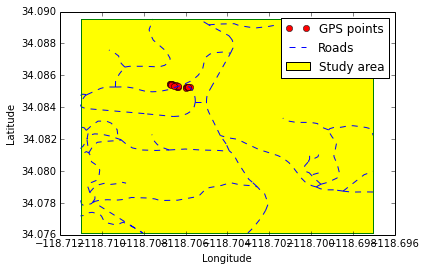

In [12]:
# make sure to install PyShp which contain shapefile library
import shapefile

# read GPS point shapefile
gps=shapefile.Reader('GPS.shp')
# PyShp's shapefile: get all records
records=gps.records()
# get the 3rd row/obs and 1-3 variable values
print records[2][0:3]

# plot as simple data objects with points and lines
plt.figure()
for shp in gps.shapeRecords():
    x = [i[0] for i in shp.shape.points[:]]
    y = [i[1] for i in shp.shape.points[:]]
    i1,=plt.plot(x,y, 'ro')
# read road lines and add the lines
roads=shapefile.Reader('roads.shp')
for shp in roads.shapeRecords():
    x = [i[0] for i in shp.shape.points[:]]
    y = [i[1] for i in shp.shape.points[:]]
    i2,=plt.plot(x,y, 'r--', color='blue')
# read studyarea polygon and add the polygon
area=shapefile.Reader('studyarea.shp') 
for shp in area.shapeRecords(): 
    x = [i[0] for i in shp.shape.points[:]] 
    y = [i[1] for i in shp.shape.points[:]]
    plt.plot(x,y, '-', color='green')
    i3,=plt.fill(x, y, 'yellow')
# draw the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# take the scientific notation from xy axis tick labels
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
# add legend items
legend=plt.legend([i1,i2,i3],['GPS points','Roads','Study area'])
legend.get_frame().set_facecolor('white')
plt.show()

### 9. GDAL - Raster

Finally, some raster example - reading and plotting suggestions..

A driver used to open the raster is AAIGrid
There is 1 band in the raster.
Dimention of the raster is 51 and 49
xOrigin     = -118.711
yOrigin     =   34.090
pixelWidth  =  0.00028
pixelHeight = -0.00028
xmin,xmax,ymin,ymax are: -118.711111111 -118.696944444 34.07611111 34.0897222211
The lowest elevation value is  128.741
The highest elevation value is  352.279


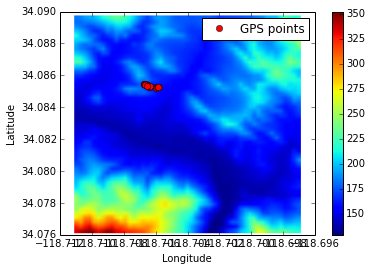

In [13]:
# Read raster data using GDAL
import gdal
raster=gdal.Open('elevation.asc') # it's a simple ASCII text file.

# Learn about the raster data
print "A driver used to open the raster is %s" % raster.GetDriver().GetDescription()
print "There is %d band in the raster." % raster.RasterCount
print "Dimention of the raster is %d and %d" % (raster.RasterXSize, raster.RasterYSize)
# band=raster.GetRasterBand(1) # In GDAL, band numbers start at 1, rather than 0.
# print band.GetMetadata()

# what transformation info is available?
transform=raster.GetGeoTransform()
print "xOrigin     =", format(transform[0],'8.3f')    # upper-left X
print "yOrigin     =", format(transform[3],'8.3f')    # upper-left Y
print "pixelWidth  =", format(transform[1],'8.5f')
print "pixelHeight =", format(transform[5],'8.5f')
xmin,xmax,ymin,ymax=transform[0],transform[0]+transform[1]*raster.RasterXSize,transform[3]+transform[5]*raster.RasterYSize,transform[3]
print "xmin,xmax,ymin,ymax are:", xmin,xmax,ymin,ymax
rarray=raster.ReadAsArray()
print "The lowest elevation value is ", rarray.min()
print "The highest elevation value is ", rarray.max()

# plot image/raster like Matlab/Octave
plt.imshow(rarray,extent=[xmin,xmax,ymin,ymax])
plt.colorbar()

# add the GPS points, as a reference
gps=ogr.GetDriverByName('ESRI Shapefile').Open('GPS.shp')
x,y=[],[]
for feature in gps.GetLayer():
    geomRef=feature.GetGeometryRef()
    x.append(geomRef.GetX()) # get X from each point and add to the list
    y.append(geomRef.GetY()) # get y from each point and add to the list
plt.plot(x,y, 'ro', label='GPS points')
legend=plt.legend(numpoints=1)
legend.get_frame().set_facecolor('white')

# take the scientific notation from xy axis tick labels
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Thank you for reading! 